In [225]:
#import warning
import warnings 
warnings.filterwarnings('ignore')


#data analysis
import pandas as pd
import numpy as np
import random as rnd
import sweetviz as sv
from tqdm.notebook import tqdm

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import PartialDependenceDisplay
from sklearn import preprocessing
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [2]:
#getting dataset

#For every data use case always use the data to be very practucal

#remove zeros in Glucose, Insulin and SkinThickness
df = pd.read_csv('C:\\Users\\danielogbu\\diabetes.csv')
df['Glucose'] = np.where(df['Glucose']==0,df['Glucose'].median(), df['Glucose'])
df["Insulin"] = np.where(df["Insulin"]==0,df["Insulin"].median(), df["Insulin"])
df["BloodPressure"] = np.where(df["BloodPressure"]==0,df["BloodPressure"].median(), df["BloodPressure"])
df["SkinThickness"] = np.where(df["SkinThickness"]==0,df["SkinThickness"].median(), df["SkinThickness"])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [3]:
#checking for null dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                46
SkinThickness                50
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

                                             |                                             | [  0%]   00:00 ->…


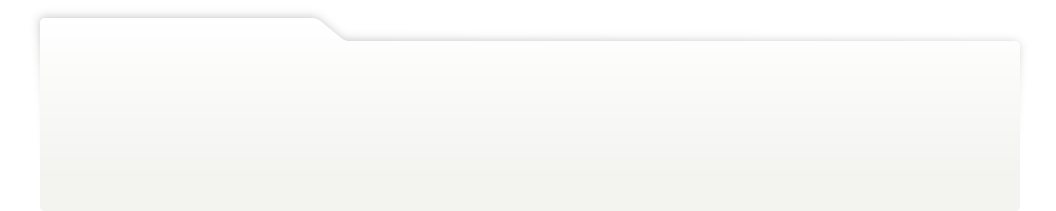
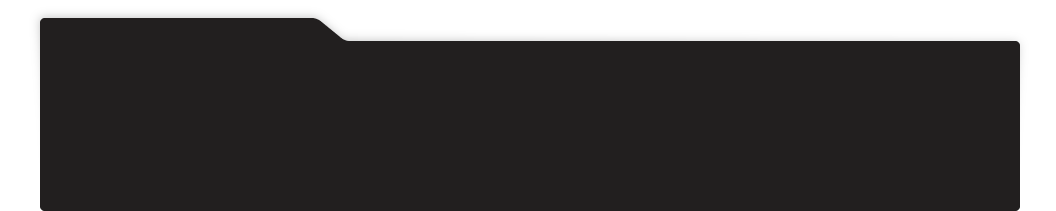
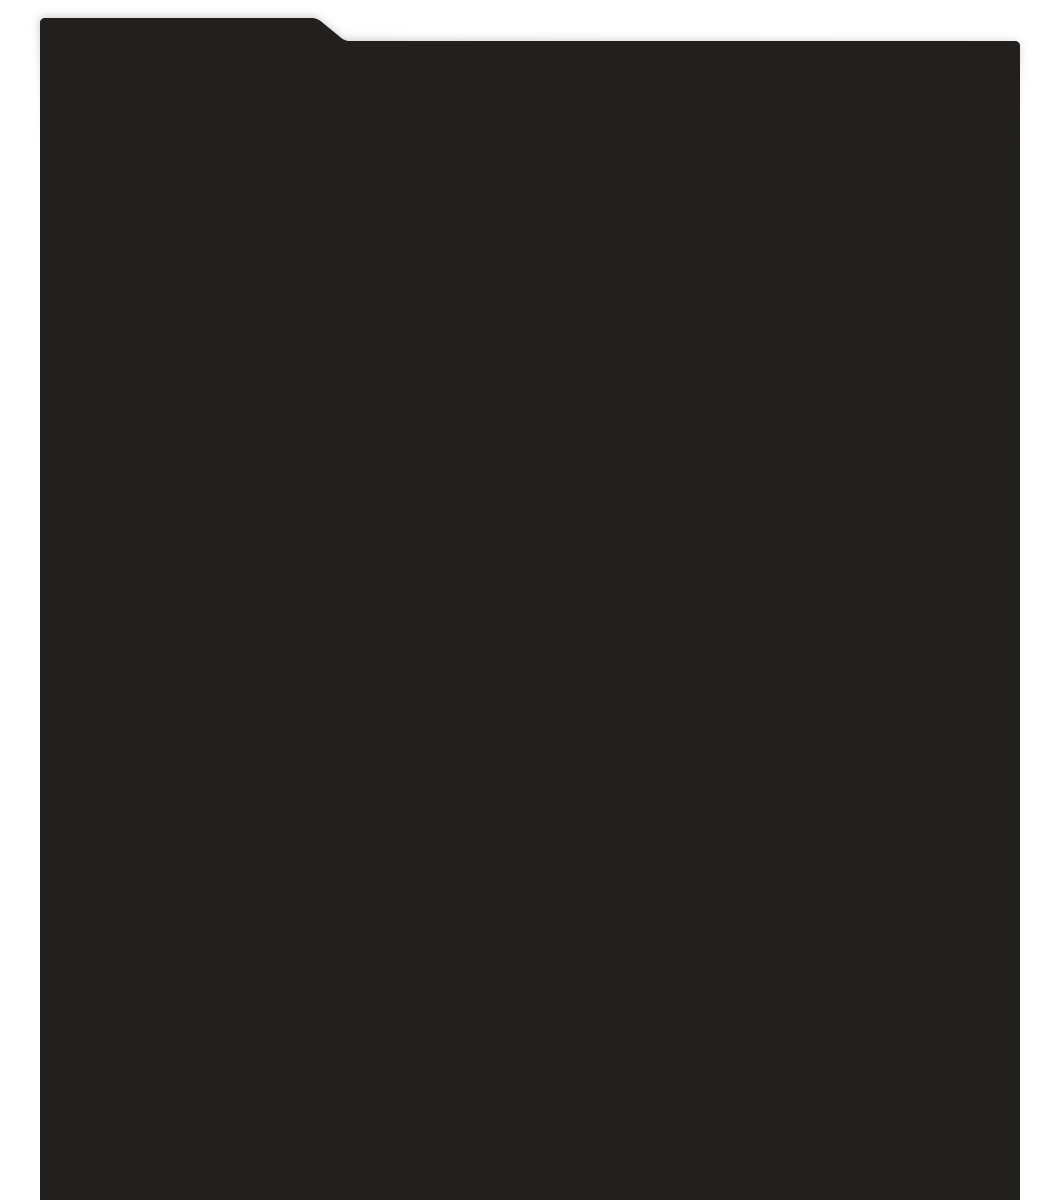
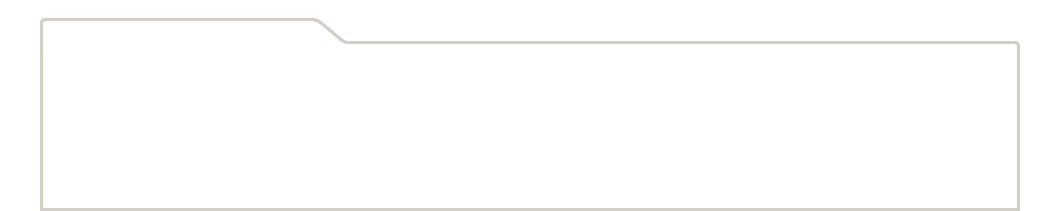
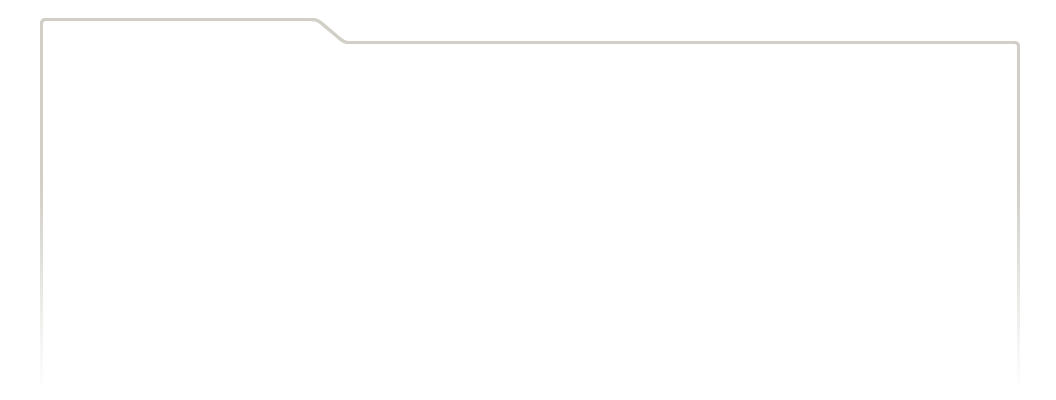
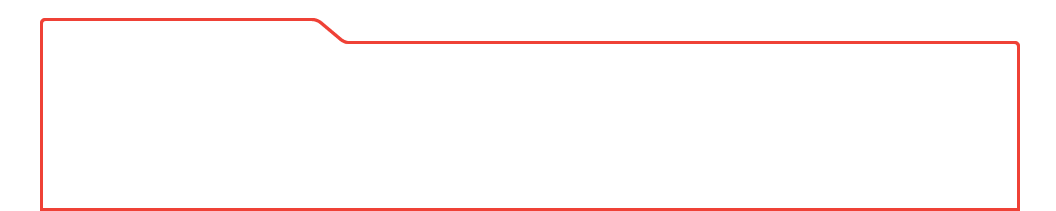
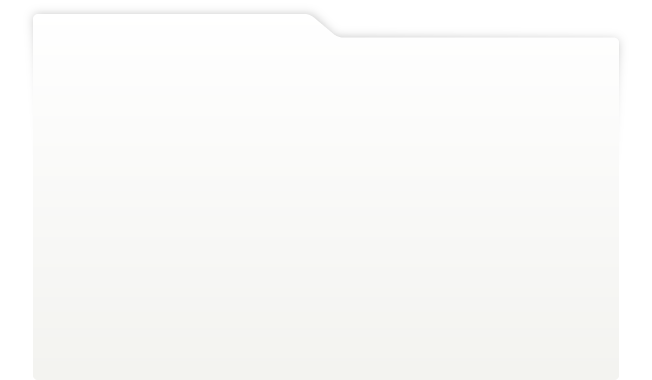
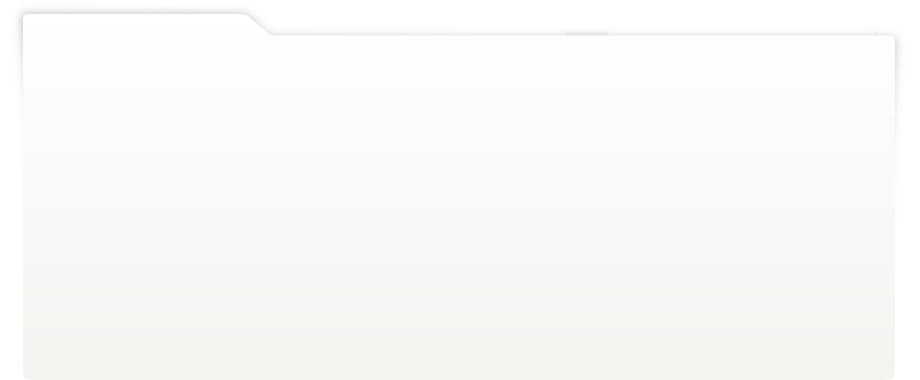
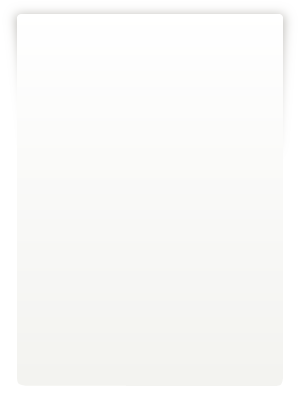
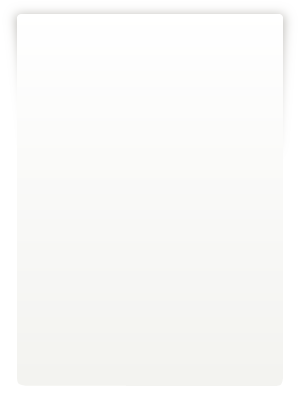
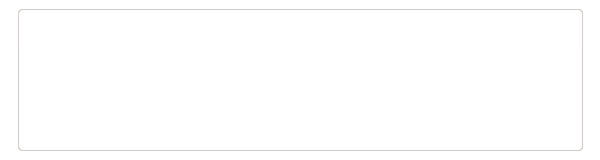
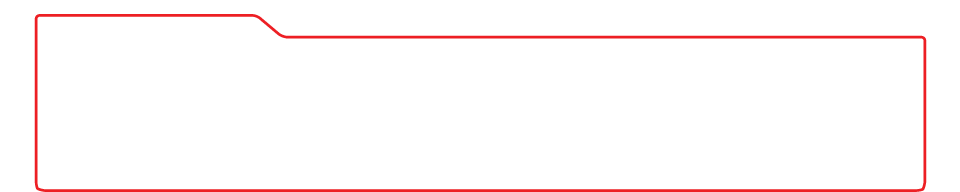
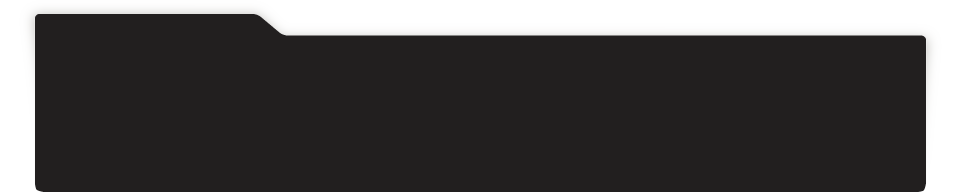
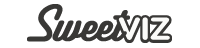
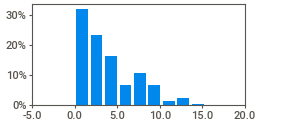
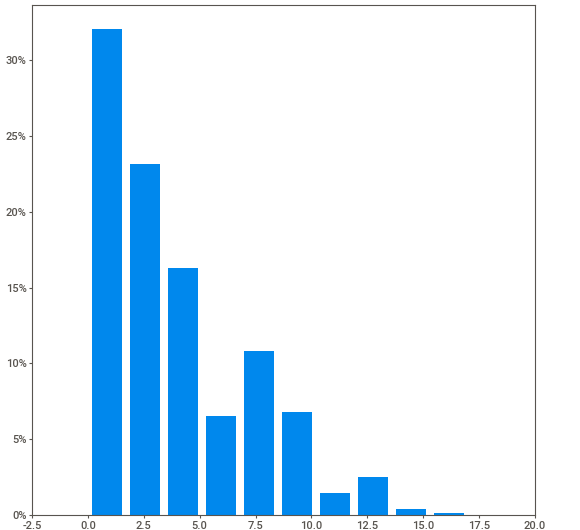
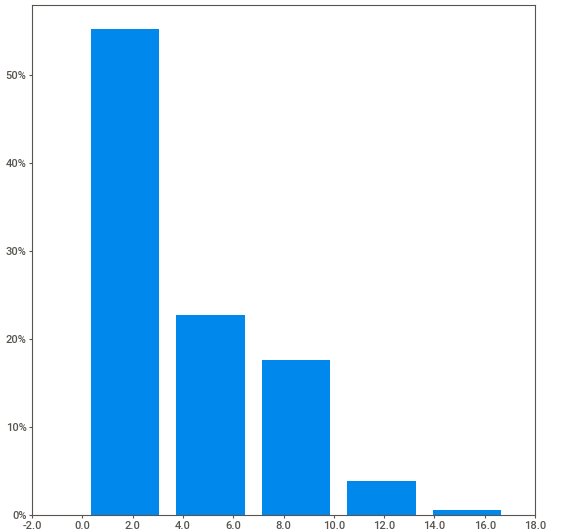
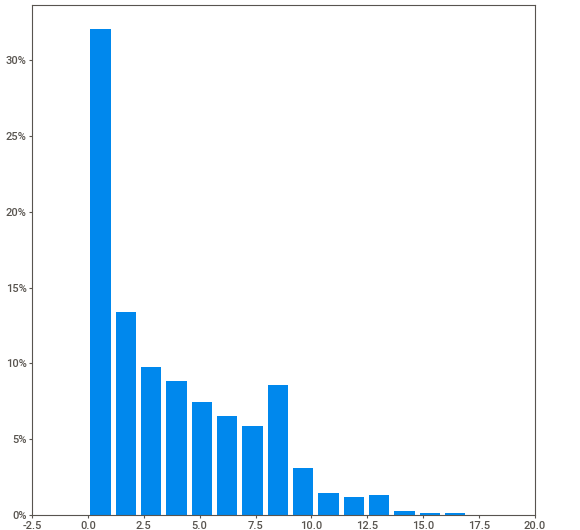
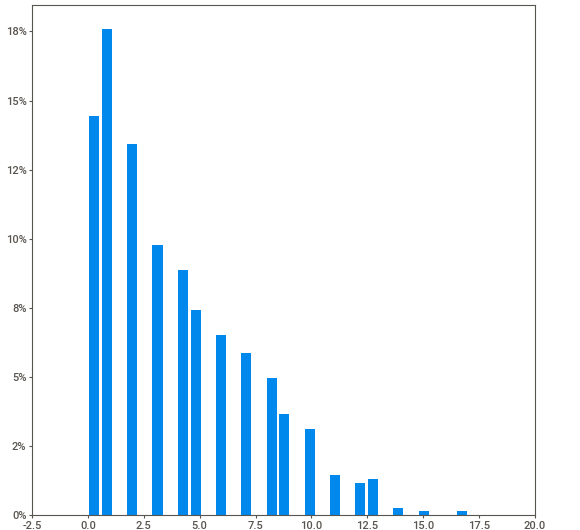
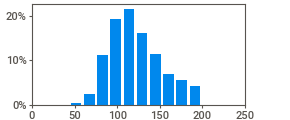
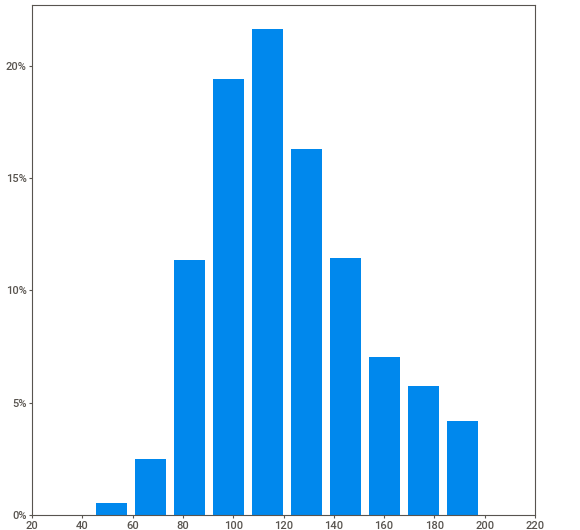
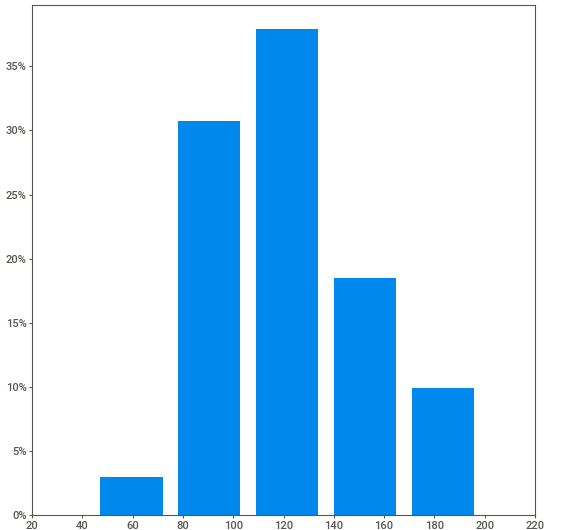
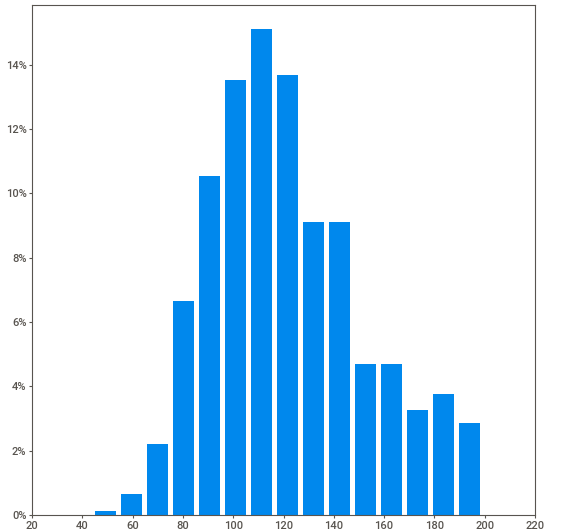
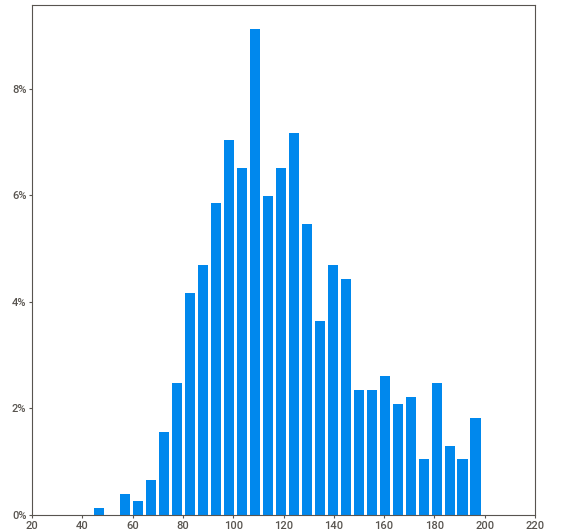
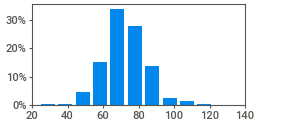
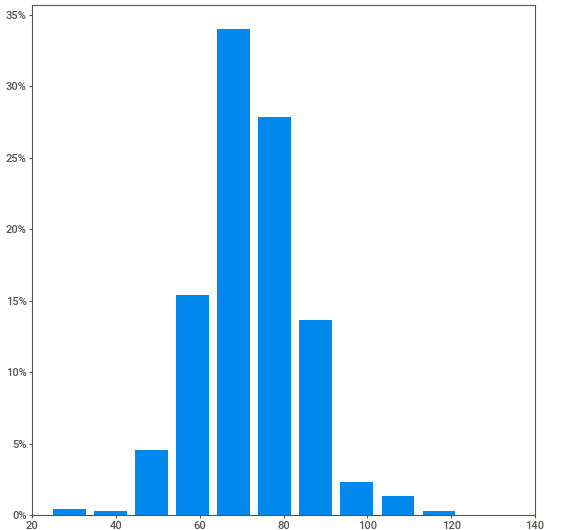
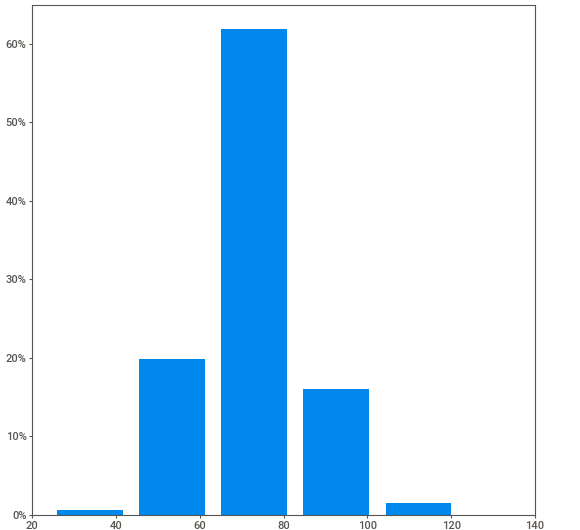
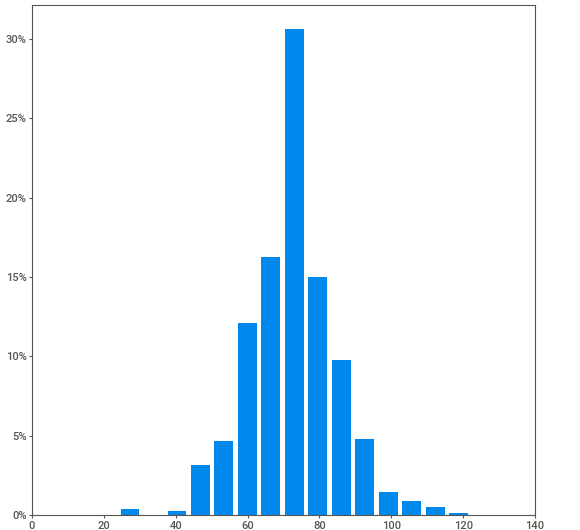
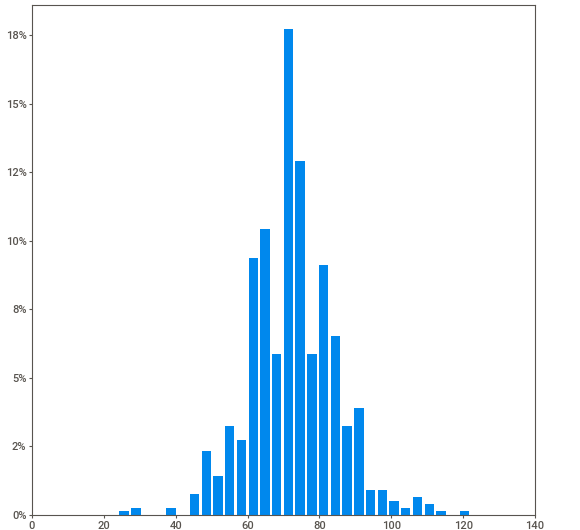
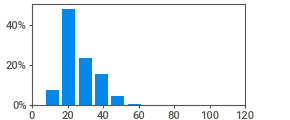
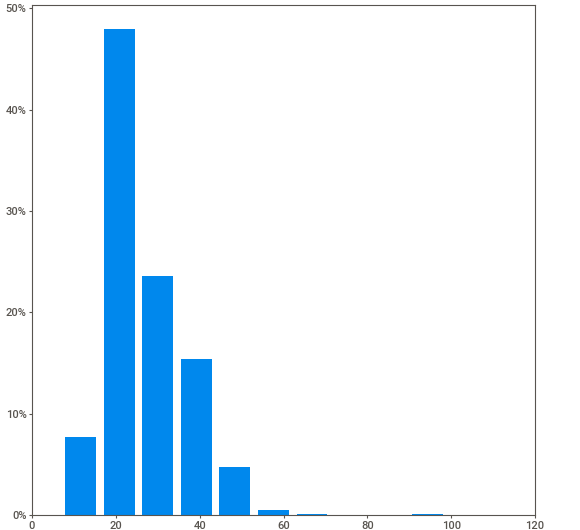
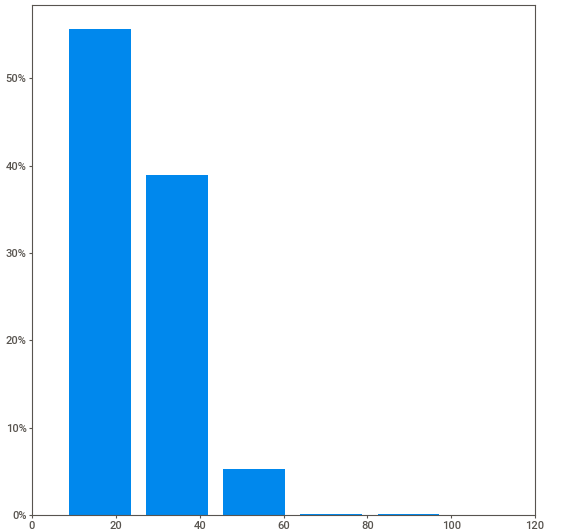
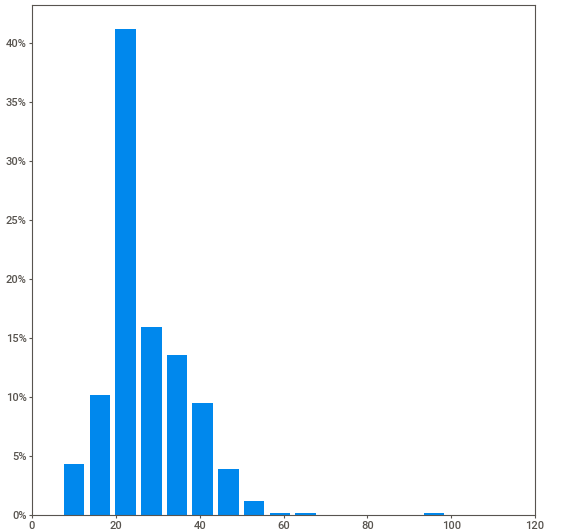
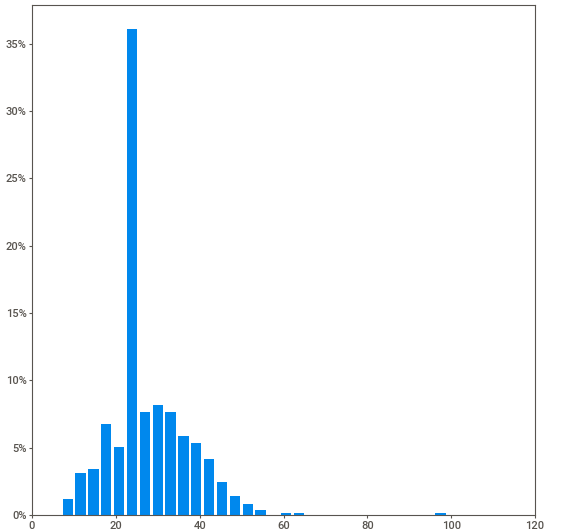
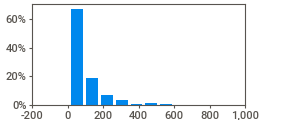
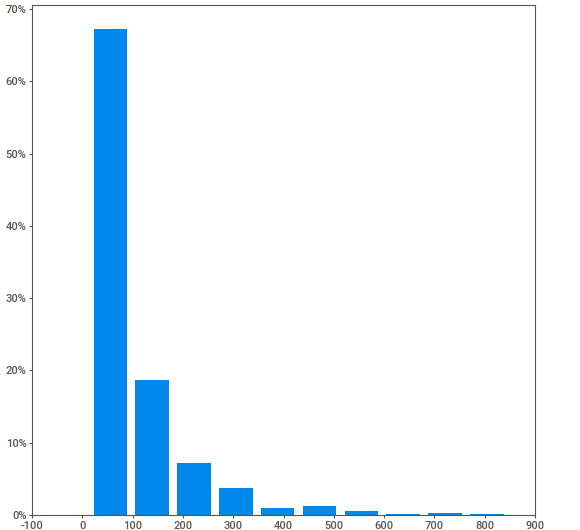
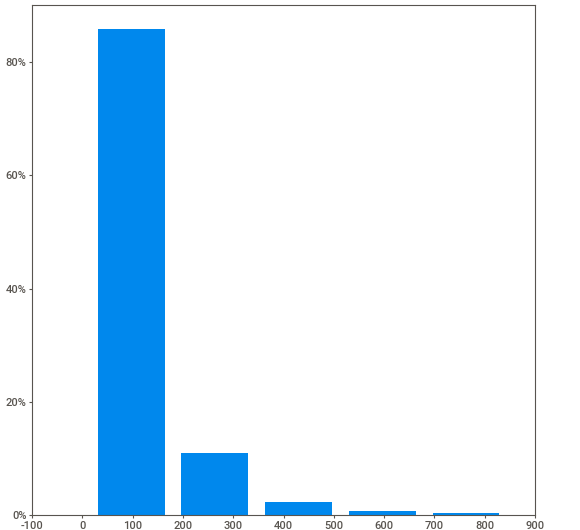
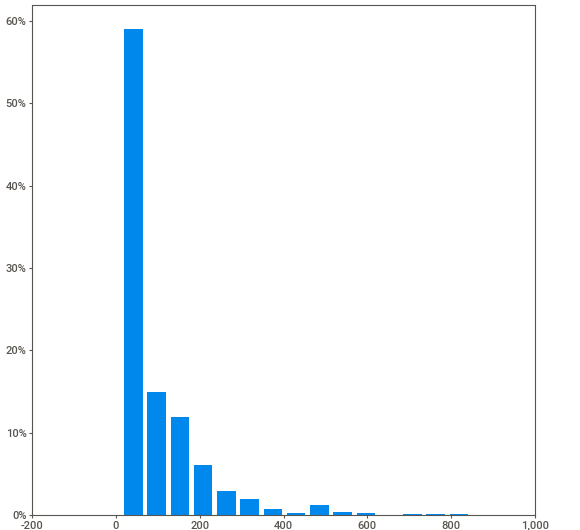
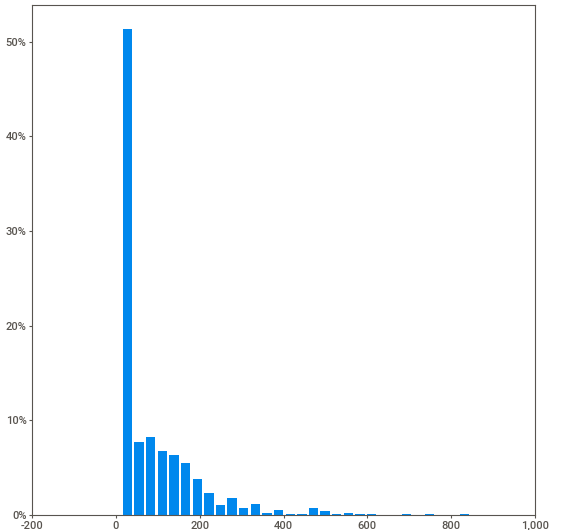
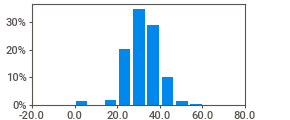
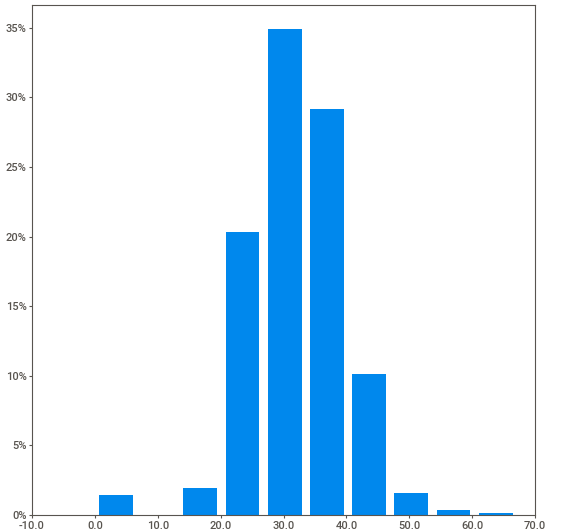
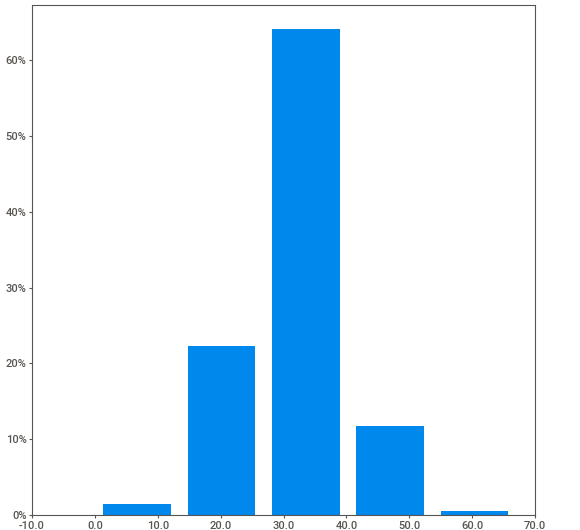
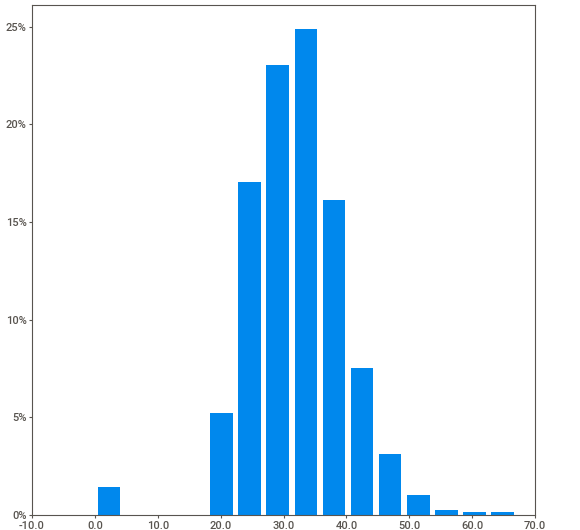
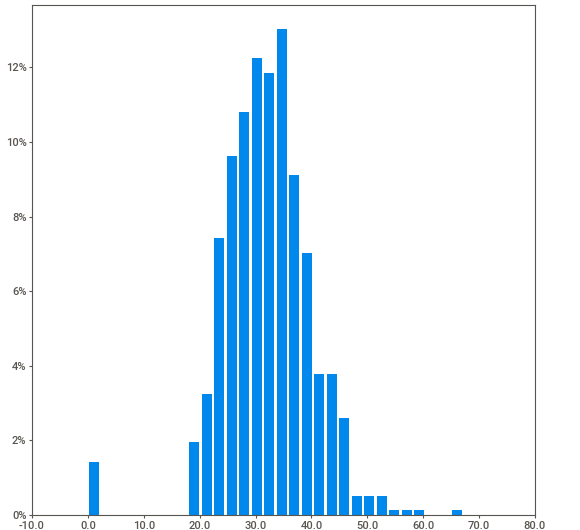
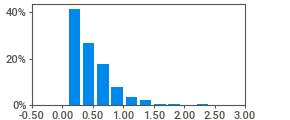
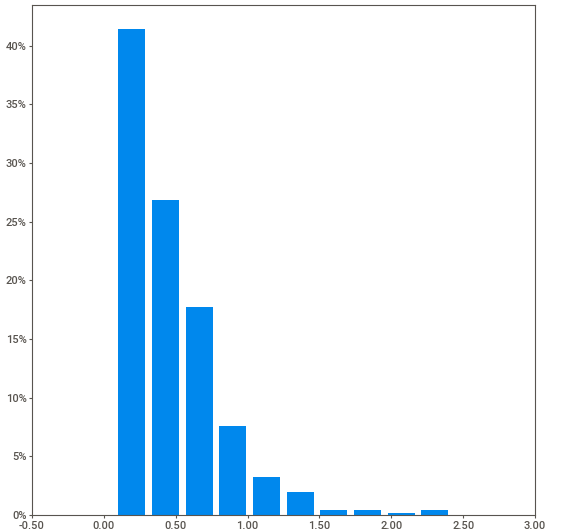
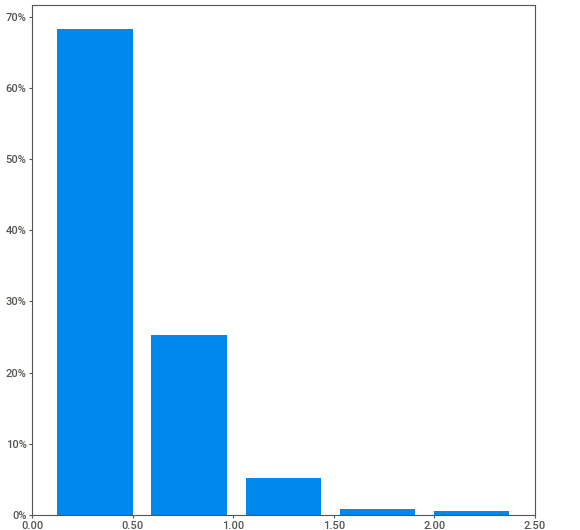
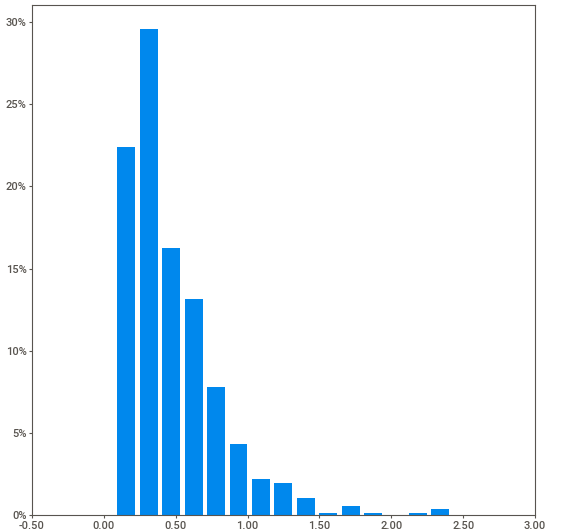
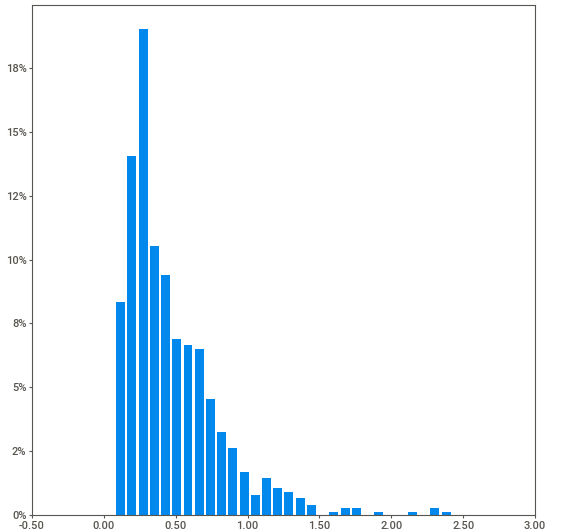
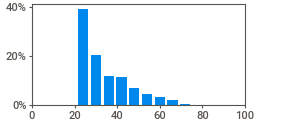
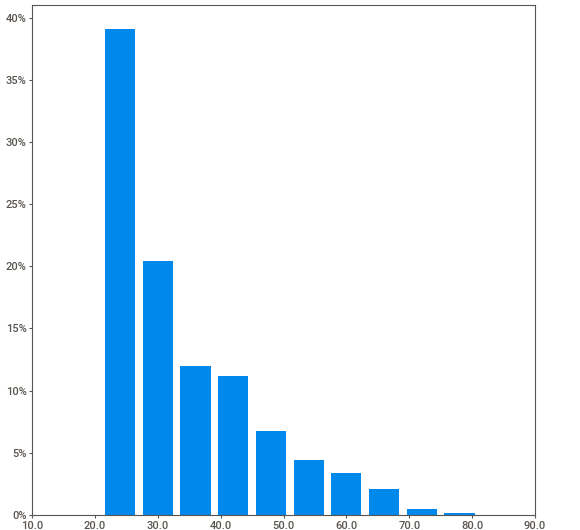
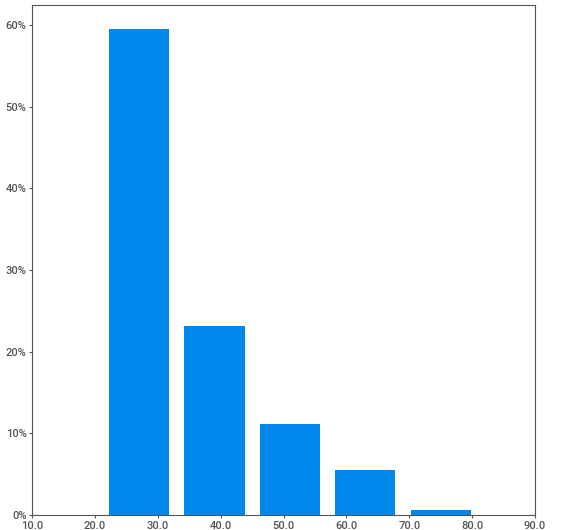
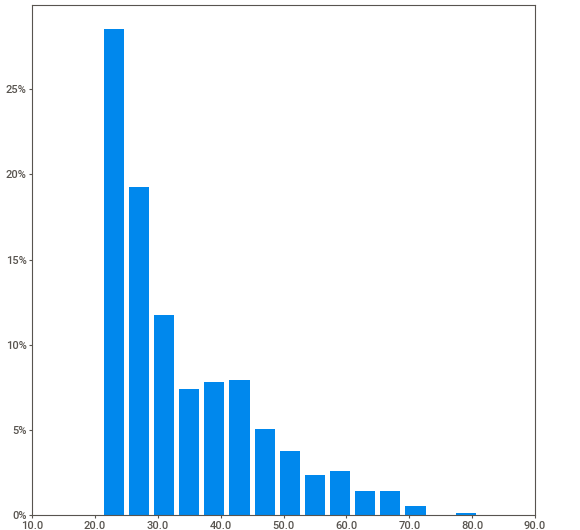
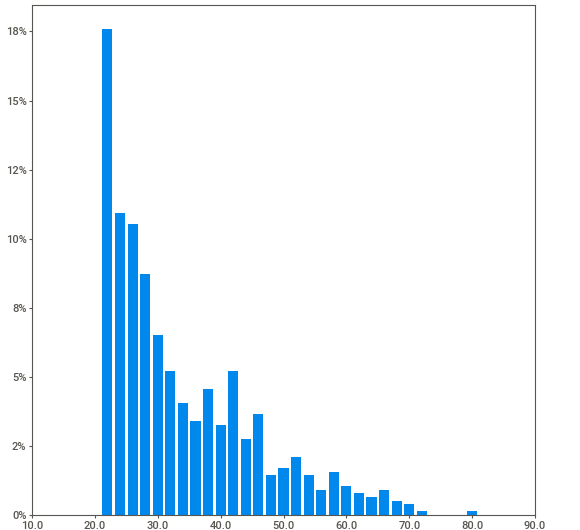
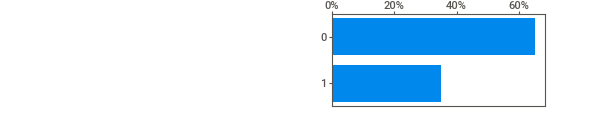
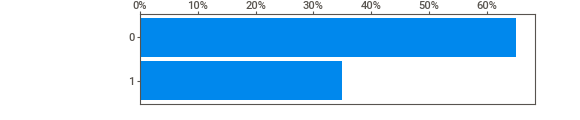
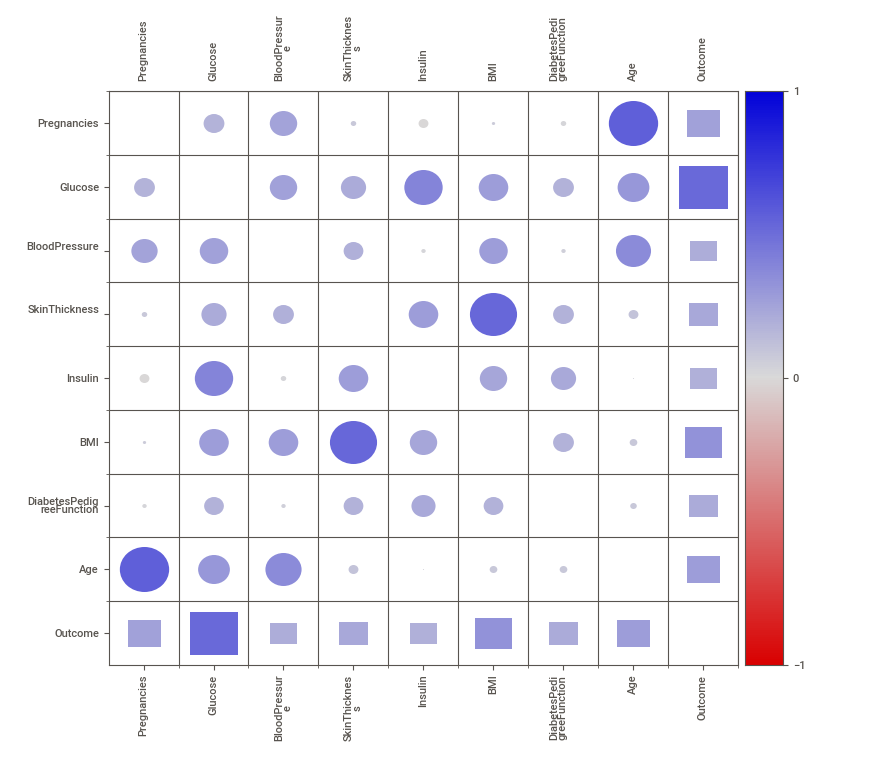
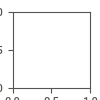

In [176]:
EDA = sv.analyze(df)
EDA.show_notebook()

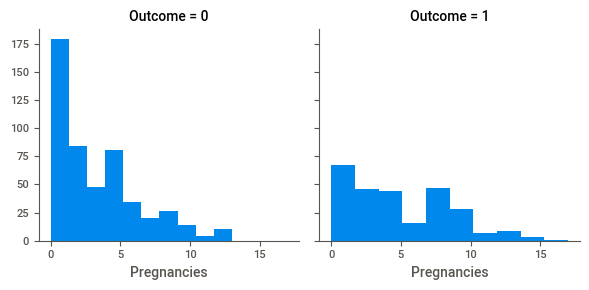

In [7]:
#large amount of pregnant folks didn't have diabetes at the early stage of pregnancy+
#highest pregnancy duration had diabetes

g = sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'Pregnancies', bins=10)

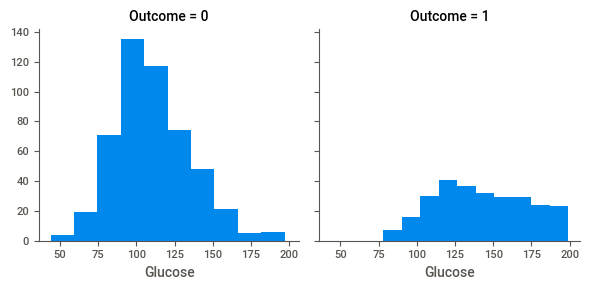

In [8]:
g = sns.FacetGrid(df, col='Outcome')
g.map(plt.hist, 'Glucose', bins=10)

#a lot of people had a high amount of glucose(blood sugar) and still don't have diabetes

In [9]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

print(X.shape, y.shape)
y.value_counts()

#imbalanced dataset

(768, 8) (768,)


0    500
1    268
Name: Outcome, dtype: int64

## Train Model

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=40)

In [226]:
#dealing with imbalanced dataset

os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 349, 1: 188})
The number of classes after fit Counter({0: 349, 1: 349})


In [241]:
# a loop for classifier models

classifiers = { 
                "Logistic Regression": LogisticRegression(max_iter=3000),
                "Random Forest": RandomForestClassifier(),
                "Decision Tree": DecisionTreeClassifier(),
                "Gaussian NB": GaussianNB(),
                "K Nearest Neighbour": KNeighborsClassifier(n_neighbors=23),
                "XGBoost": xgb.XGBClassifier()
            }

metric_list = list()

preds_arr = None

for clf_name, clf_function in tqdm(classifiers.items()):
    clf_function.fit(X_train_ns,y_train_ns)
    preds = clf_function.predict(X_test)
    metric_list.append((100*accuracy_score(y_test, preds)).round(2))
    print(f"{clf_name}, {metric_list[-1]}")

  0%|          | 0/6 [00:00<?, ?it/s]

Logistic Regression, 69.7
Random Forest, 74.89
Decision Tree, 69.7
Gaussian NB, 71.86
K Nearest Neighbour, 65.8
XGBoost, 71.86


[[113  29]
 [ 30  59]]


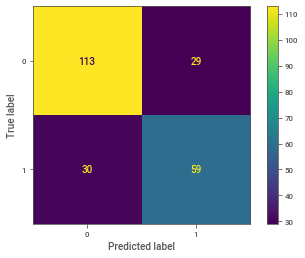

{'Accuracy': 0.72, 'Precision': 0.58, 'Recall': 0.69, 'F1_value': 0.63}

In [251]:
#understand other classifier metrics for the model with the highest accuracy

def evaluate_preds(y_true, Rnd_preds):
    """
    performs evaluationn comparison on y_true labels vs. y_pred labesl on a classifcation.
    """
    Accuracy = accuracy_score(y_test, Rnd_preds)
    Precision = precision_score(y_test, Rnd_preds)
    Recall = recall_score(y_test, Rnd_preds)
    F1_value = f1_score(y_test, Rnd_preds)
    ConfusionMatrix = confusion_matrix(y_test, Rnd_preds)
    metric_dict = {"Accuracy": round(Accuracy,2),
                   "Precision": round(Precision,2),
                   "Recall": round(Recall,2),
                  "F1_value": round(F1_value,2)}
    return metric_dict

print(ConfusionMatrix)
disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=logisticmodel.classes_)
disp.plot()
plt.show()

#baseline evaluation for the RndForest
RndClf = RandomForestClassifier()
RndClf.fit(X_train_ns,y_train_ns)
Rnd_preds = clf_function.predict(X_test)
baseline_metrics = evaluate_preds(y_test, Rnd_preds)
baseline_metrics

Text(0, 0.5, 'Error Rate')

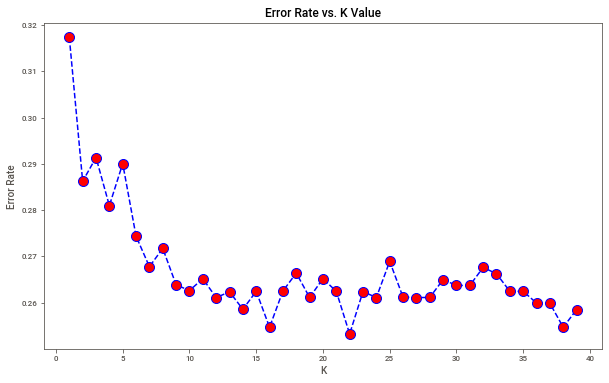

In [242]:
#checking for the value of our nearest neighbour

from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_ns,y_train_ns)

pred = knn.predict(X_test)

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=20)
    error_rate.append(1-score.mean())

plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

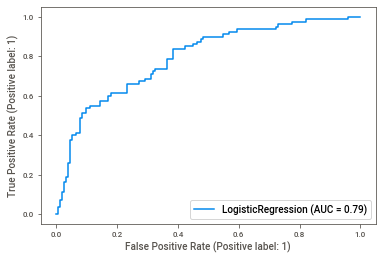

In [243]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train_ns,y_train_ns)
roc_auc_score(y_train_ns, clf.predict_proba(X_train_ns)[:, 1])
roc_auc_score(y_train_ns, clf.decision_function(X_train_ns))
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [245]:
feature_scores = pd.Series(classifiers["Random Forest"].feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Glucose                     0.275802
BMI                         0.190946
Age                         0.142577
DiabetesPedigreeFunction    0.101111
BloodPressure               0.081785
Pregnancies                 0.071927
SkinThickness               0.071364
Insulin                     0.064489
dtype: float64

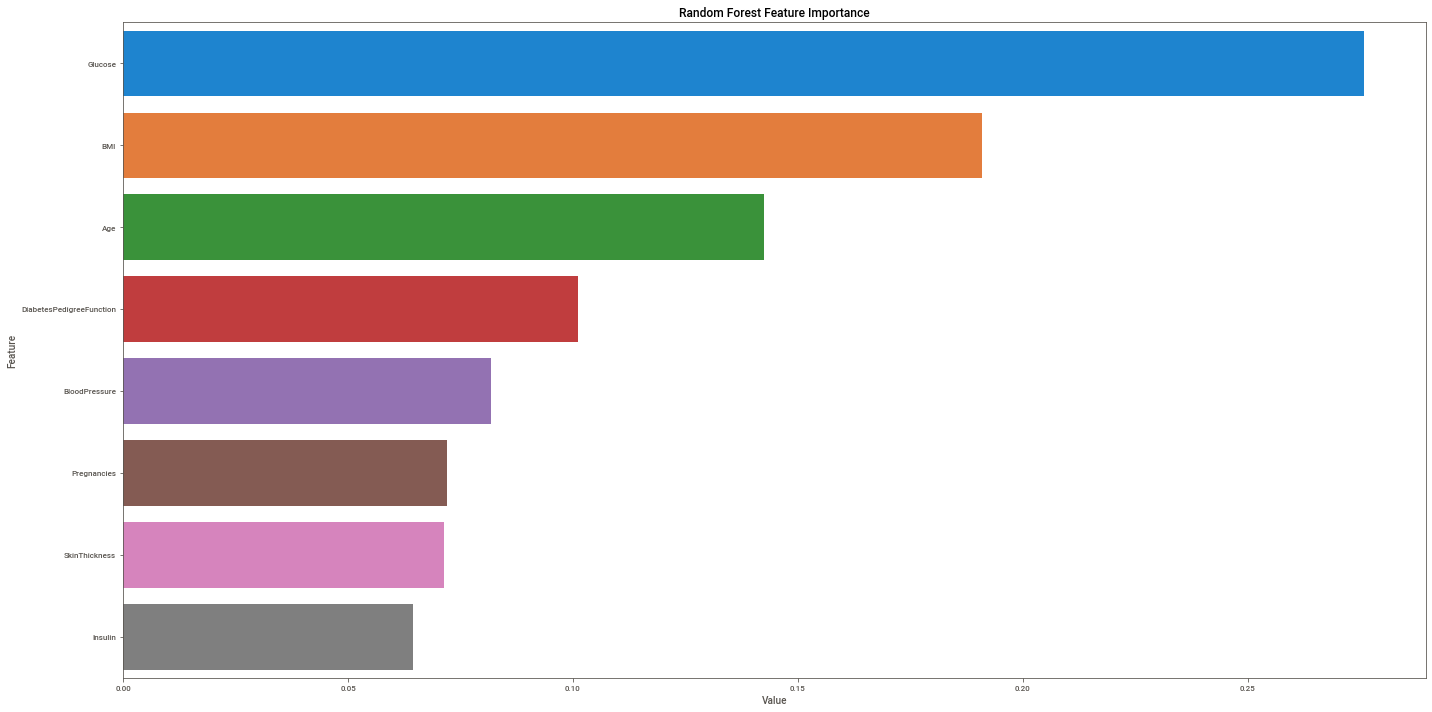

In [246]:
feature_imp = pd.DataFrame(sorted(zip(classifiers["Random Forest"].feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

## Model Optimization

1. Model tuning by hand
2. Grid Search
3. Random Search

There are other model optimization method like XGBoost, Gradient Descent, Stochastic Gradient Descent

In [247]:
classifiers["Random Forest"].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [252]:
np.random.seed(42)

#create a second lm model with different hyperparameters

rclf_byhand = RandomForestClassifier(n_estimators=3,criterion='gini',
                             max_features='sqrt',min_samples_leaf=10,random_state=100)
rclf_byhand.fit(X_train_ns, y_train_ns)

#Predictions
y_preds_rcfhand = rclf_byhand.predict(X_test)

#Evaluate
manualtuning_metrics = evaluate_preds(y_test, y_preds_rcfhand)
manualtuning_metrics

{'Accuracy': 0.72, 'Precision': 0.58, 'Recall': 0.74, 'F1_value': 0.65}

In [254]:
#Using Randomized Search CV 

randomgrid = {'n_estimators': [int(x) for x in np.linspace(200, 2000, num=10)],
             "max_depth": [int(x) for x in np.linspace(10, 1000, num=10)],
             'max_features': [None, 'auto', 'sqrt', 'log2'],
             'min_samples_split': [2,5,10,14],
             'min_samples_leaf': [1, 2, 4,6,8],
              'criterion': ['entropy', 'gini']}

np.random.seed(42)

#train/tesst split

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#instantiate the model
rcf = RandomForestClassifier()
rcf_rcv = RandomizedSearchCV(estimator=rcf, param_distributions=randomgrid, n_iter=100,cv=3, verbose=2, random_state=100, n_jobs=-1)

rcf_rcv.fit(X_train_ns, y_train_ns)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [255]:
rcf_rcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 340,
 'criterion': 'gini'}

In [256]:
best_random_grid=rcf_rcv.best_estimator_

rcf_pred = best_random_grid.predict(X_test)

rcf_metrics = evaluate_preds(y_test, rcf_pred)
rcf_metrics

{'Accuracy': 0.74, 'Precision': 0.61, 'Recall': 0.71, 'F1_value': 0.66}

<AxesSubplot:>

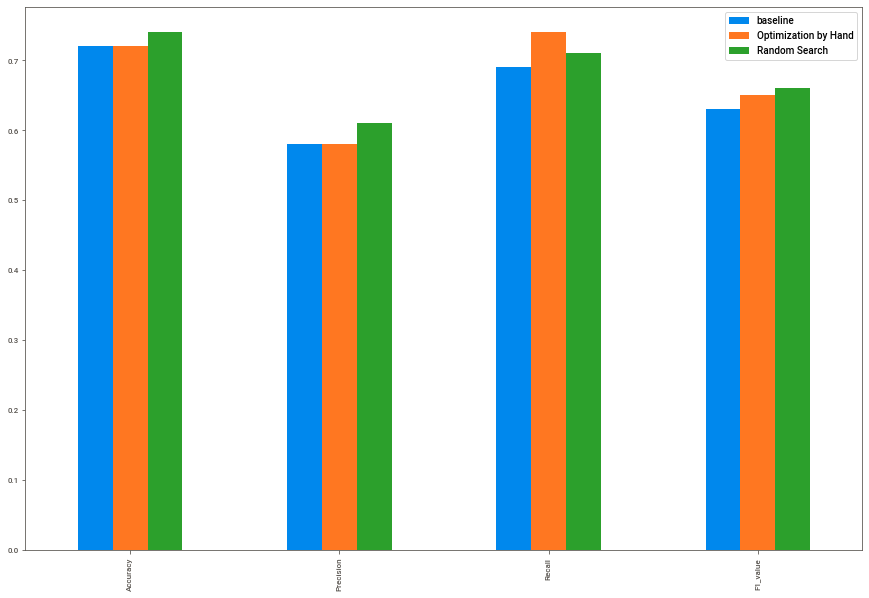

In [257]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "Optimization by Hand": manualtuning_metrics,
                              "Random Search": rcf_metrics})

compare_metrics.plot.bar(figsize=(15,10))

# Model Explainability

In [260]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'Predict'] = DecisionTree.predict(X_output)

X_output.iloc[50:55]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predict
629,4,94.0,65.0,22.0,30.5,24.7,0.148,21,0
516,9,145.0,88.0,34.0,165.0,30.3,0.771,53,1
375,12,140.0,82.0,43.0,325.0,39.2,0.528,58,1
451,2,134.0,70.0,23.0,30.5,28.9,0.542,23,1
511,0,139.0,62.0,17.0,210.0,22.1,0.207,21,0


In [258]:
#Using SHAP

import shap

explainer = shap.TreeExplainer(model=DecisionTree)
shap_values = explainer.shap_values(X_test)

In [259]:
i = 50
output = 0
print(f"For sample: {i} and output: {output}")
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], features=X.columns)

# Output value: is the prediction for that observation
# Base value: the value that would be predicted if we did not know any features for the current output
# red: Push the prediction higher// blue: Push the prediction lower
# BMI impacted the output negatively

For sample: 50 and output: 0


In [263]:
i = 53
output = 1
print(f"For sample: {i} and output: {output}")
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i,:], features=X.columns)

For sample: 53 and output: 1


# Counterfactuals Explanation

In [264]:
import dice_ml
from dice_ml.utils import helpers  # helper functions

# provide the trained ML model to DiCE's model object
d = dice_ml.Data(dataframe=df, continuous_features=list(X.columns), outcome_name='Outcome')
backend = 'sklearn'
m = dice_ml.Model(model=DecisionTree, backend=backend)

In [266]:
# initiate DiCE
exp_random = dice_ml.Dice(d, m, method="random")
query_instances = pd.DataFrame(X_train_ns[4:6], columns=X.columns)

# generate counterfactuals
dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=3, desired_class="opposite", verbose=False)
dice_exp_random.visualize_as_dataframe(show_only_changes=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.96it/s]

Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,103.0,30.0,38.0,83.0,43.299999,0.183,33,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-,-,83.6,-,-,3.6,0.183,-,1.0
1,-,-,80.4,-,-,0.9,0.183,-,1.0
2,-,-,57.0,-,-,44.00000000000001,1.345,-,1.0


Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,82.0,52.0,22.0,115.0,28.5,1.699,25,0



Diverse Counterfactual set (new outcome: 1.0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,16.0,-,-,-,-,28.999999999999996,1.699,-,1.0
1,-,-,-,-,178.5,66.1,1.699,-,1.0
2,17.0,-,-,-,-,55.4,1.699,-,1.0
